# Logistic Regression
## Classification

The main difference between linear and logistic regression is that the values $y$ which we predict are on a discrete space. 
Some simple examples where $y\in\{0,1\}$ for classification are:
- Email: 0=Not Spam/1=Spam 
- Transactions: Fraudulent (1=Yes/0=No)?
- Tumor 0=Benign/1=Malignant?

We will start by looking into a **binary classification** classification problem where y can only take on two values (0 and 1). Later we will look into **multi-class classification** where $y$ can take an arbitrary amount of discrete values.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

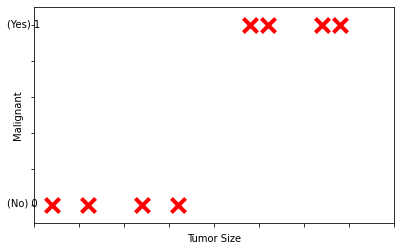

In [2]:
y = [0, 0, 0, 0, 1, 1, 1, 1]
x = [0.1, 0.3, 0.6, 0.8, 1.2, 1.3, 1.6, 1.7]
fig=plt.figure(figsize=(5,3))
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Malignant')
ax.set_xlim([0,2])
ax.set_ylim([-0.1,1.1])
ax.annotate('(Yes) 1',xy=(0,0),xytext=(-0.15,0.99),annotation_clip=False)
ax.annotate('(No) 0',xy=(0,0),xytext=(-0.15,-0.01),annotation_clip=False)
ax.scatter(x, y, s=200, marker='x', color='r', linewidth=4)
plt.show()

If we use linear regression as we learned before, we would fit a line $h_{\theta}(x) = \theta^Tx$ through our plot. The following code block computes the optimal values for $\theta$ using the normal equation. 
\begin{align}
\theta = (X^TX)^{-1}X^Ty
\end{align}

We can add a threshold and make classifications based on the predicted value.
\begin{align}
\text{If } h_\theta(x) \geq 0.5,\text{ predict } y=1\\
\text{If } h_\theta(x) < 0.5,\text{ predict } y=0
\end{align}

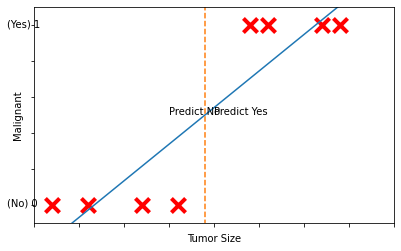

In [3]:
X = np.array([np.ones(len(x)),x]).T
theta = inv(X.T.dot(X)).dot((X.T.dot(y)))
norm_x = [0,2]
norm_y = theta.dot([np.ones(2),norm_x])
ax.plot(norm_x, norm_y)
ax.plot([0.95,0.95], [-0.2,1.2],linestyle='dashed')
ax.annotate('Predict No',xy=(0,0),xytext=(0.75,0.5),annotation_clip=False)
ax.annotate('Predict Yes',xy=(0,0),xytext=(1,0.5),annotation_clip=False)
fig

In the given example, linear regression would preform reasonably well on this classification task. However, if we add more outlier values to our example, we will quickly see that this method will not perform quite as well anymore.
Let's add a positive value for $x=5$ to our training set:

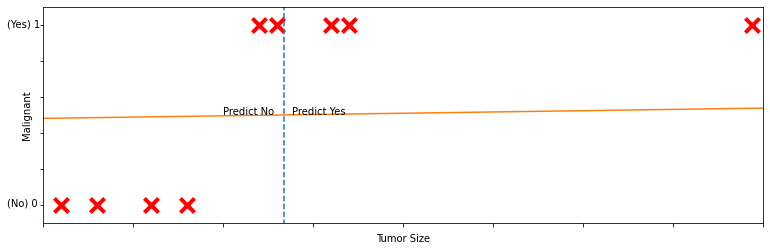

In [4]:
y_outlier = y + [1]
x_outlier = np.append(np.array(x)/2,20)
X = np.array([np.ones(len(x_outlier)),x_outlier]).T
theta = inv(X.T.dot(X)).dot((X.T.dot(y_outlier)))
norm_x = [0,5]
norm_y = theta.dot([np.ones(2),norm_x])
fig=plt.figure(figsize=(10,3))
ax=fig.add_axes([0,0,1,1])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlim([0,2])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Malignant')
ax.annotate('(Yes) 1',xy=(0,0),xytext=(-0.1,0.99),annotation_clip=False)
ax.annotate('(No) 0',xy=(0,0),xytext=(-0.1,-0.01),annotation_clip=False)
#For visualization puropses I will move the outlier closer than it is
x_outlier[-1] = 1.97
ax.scatter(x_outlier, y_outlier, s=200, marker='x', color='r', linewidth=4)
ax.plot([0.67,0.67], [-0.2,1.2],linestyle='dashed')
ax.annotate('Predict No',xy=(0,0),xytext=(0.5,0.5),annotation_clip=False)
ax.annotate('Predict Yes',xy=(0,0),xytext=(0.69,0.5),annotation_clip=False)
ax.plot(norm_x, norm_y)
plt.show()

We can observe that with such an outlier, our regression line will shift and we with the new datapoint, we might create wrong predictions. For the algorithm, it should be no surprise that the outlier is a positive point. However, it should also not have such a big effect on the other training samples.

This should show that linear regression is not very suitable for classification problems. Mainly because classification is not actually a linear function.

Another observation that we can make is that our algorithm can output values which exceed the limit of $0<y<1$ (see first example). The algorithm should not be able to predict such predictions.

For the **logistic regression** classification algorithm, we have:
\begin{align}
0 \leq h_\theta(x) \leq 1
\end{align}

### Hypothesis function

How can we come up with a hypothesis function that satisfies $0 \leq h_\theta(x) \leq 1$?

We will obtain this by wrapping our predictions with the **Sigmoid function** (alternatively Logistic function): $h_\theta(x) = 
g(\theta^Tx)$

The Sigmoid function essentially maps any value $z \in \mathbb{R}$ in the range (0,1)
\begin{align}
g(z) = \frac{1}{1+e^{-\theta^Tx}}
\end{align}
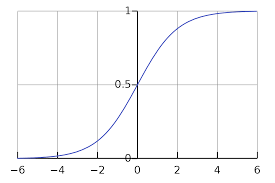

We treat the output $h_\theta(x)$ as the estimated probability that y=1 on input x
Looking at the tumor example from above. Say that for a given tumor size, the hypothesis is $h_\theta(x)=0.7$. In words that means that there is a 70% chance that the tumor is being malignant.

In terms of probabilities, we write $h_\theta(x) = p(y=1|x;\theta)$ = "probability that y=1, given x, parameterized by $\theta$". We can compute the probabilities for y=1 and y=0 

$P(y=0|x;\theta)+P(y=1|x;\theta)=1$

$P(y=0|x;\theta) = 1 - P(y=1|x;\theta)$


## Decision boundaries

Suppose we want to predict that "y=1" if $h_\theta(x) \geq 0.5$ and predict that "y=0" if $h_\theta(x) < 0.5$. Then our decision boundary would be at 0.5.

Looking at the Sigmoid function, we can see that $g(z) \geq 0.5 \text{ when } z \geq 0$ and therefore $h_\theta(x) = g(\theta^Tx) \geq 0.5 \text{ whenever } \theta^Tx \geq 0$.

Likewise we have that $g(z) \leq 0.5 \text{ when } z \leq 0$ and therefore $h_\theta(x) = g(\theta^Tx) \leq 0.5 \text{ whenever } \theta^Tx \leq 0$.

**Example**
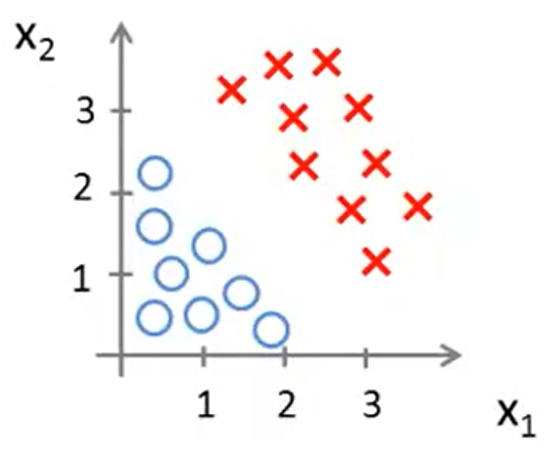
Let's take the following hypothesis function $h_\theta(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2)$ and for the sake of demonstration, we will specify $\theta = [-3,1,1]^T$ (we will discuss later how we can compute $\theta$).
From what we learned above, we know that we predict $y=1$ if 
\begin{align}
g(\theta^Tx)\geq0 \iff -3 + x_1 + x_2 \geq 0 \iff x_1 + x_2 \geq 3
\end{align}

This results in a line which clearly separates the two classes. These two classes are separated by our **decision boundary** (pink line). The boundary is a property of our hypothesis function, not the data set.
When we learn how to fit the parameters, we will use training data to determine the data of $\theta$ but once we have the parameters, we don't need a dataset to compute the decision boundary.

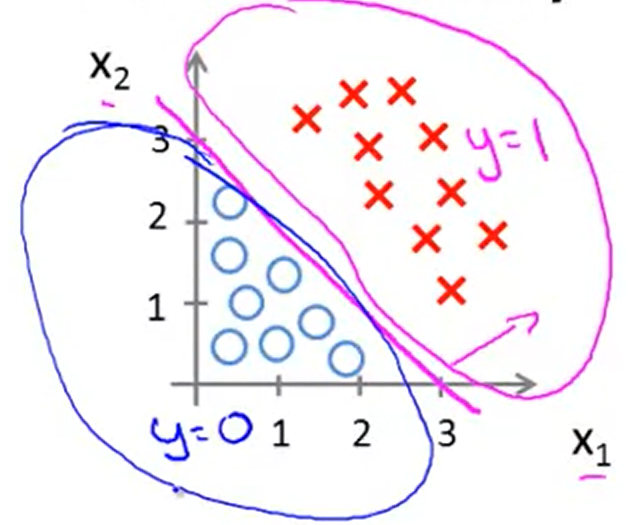

**Non-linear decision boundaries**

If we have data which we can not linearly separate, we can have features which allow for non-linear separation: 
Consider the hypothesis $h_\theta(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_1 + \theta_3x^2_1 + \theta_4x^2_2$ and parameter vector $\theta = [-1, 0, 0, 1, 1]^T$

We predict y=1, when $-1 + x^2_1 + x^2_2 \geq 0$. This will give us the decision boundary of a circle. 

Note that with a higher order hypothesis function, we can build more complex shapes of decision boundaries.

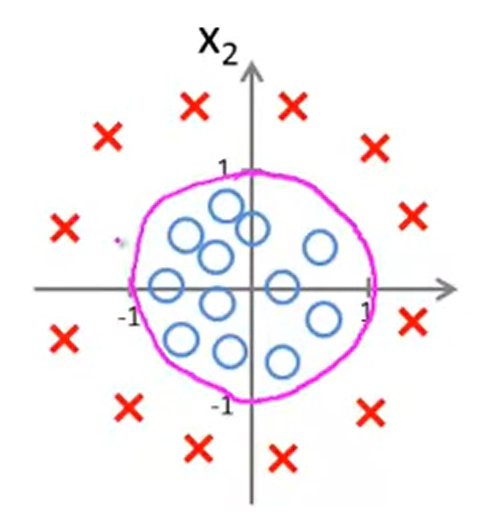

## Cost function

In general, we have:

- Training set: $\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}), \dots, (x^{(m)},y^{(m)})\}$
- m examples $x \in [x_0, x_1, \dots, x_n]^T$, where $x_0 = 1, y\in \{0,1\}$
- $h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$

How do we choose the parameters $\theta$.
Recall that from Linear regression, we had: $J(\theta) = \frac{1}{m}\sum^{m}_{i=1} \frac{1}{2} (h_\theta(x^{(i)})-y^{(i)})^2 $

For Logistic regression, the term in the sum is (due to the Sigmoid function) a non-convex term. Therefore, our gradient descent algorithm would not work and get stuck in a local minimum. Thus we need to come up with a new cost function for logistic regression. 

We will use this function: 
\begin{align}
Cost(h_\theta(x),y) = \begin{cases}
               -log(h_\theta(x)) \hspace{2.7em}\text{if y=1}\\
               -log(1- h_\theta(x)) \hspace{1em}\text{ if y=0}\\
            \end{cases}
\end{align}

Let's visualize the functions for these two cases:

Text(0.5, 1.0, 'If y = 0')

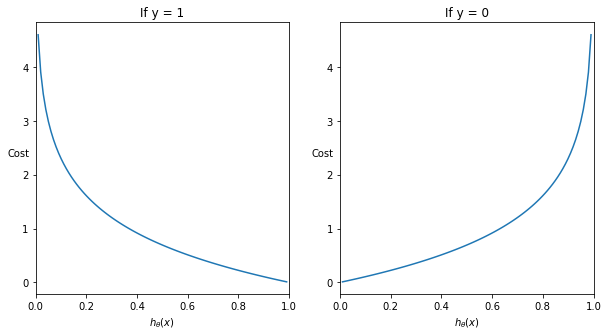

In [19]:
x = np.linspace(0,1,100)
y0 = -np.log(x[1:-1])
y1 = -np.log(1- x[1:-1])

fig, (Y0, Y1) = plt.subplots(1, 2, figsize=(10,5))
Y0.plot(x[1:-1], y0, linestyle='solid')
Y0.set_xlabel(r'$h_\theta(x)$')
Y0.set_xlim(0, 1)
Y0.set_ylabel('Cost', rotation=0)
Y0.set_title("If y = 1")

Y1.plot(x[1:-1], y1, linestyle='solid')
Y1.set_xlabel(r'$h_\theta(x)$')
Y1.set_xlim(0, 1)
Y1.set_ylabel('Cost', rotation=0)
Y1.set_title("If y = 0")

This cost function has a few properties. 
- It is convex
- It is intuitive in terms of "the further away we are from predicting correctly, the higher the cost"
- If we predict correctly, then the cost is 0

Since y is always either 0 or 1, we can simplify the cost function as:
\begin{align}
Cost = -ylog(h_\theta(x)) - (1-y)log(1- h_\theta(x))
\end{align}

Our complete cost function is the **principle maximum (log-)likelyhood** which we could derive from statistics:

\begin{align}
J(\theta) = -\frac{1}{m}\sum^{m}_{i=1} \{ylog(h_\theta(x)) + (1-y)log(1- h_\theta(x))\}
\end{align}

We can find our parameters $\theta$ again, using Gradient Descent. It turns out that the update rule is identical to Linear Regression.

$
\text{Want } min_\theta J(\theta):\\
\hspace{1em} \text{Repeat}\{\\
\hspace{2em} \theta_j := \theta_j - \alpha\frac{\Delta}{\Delta\theta_j}J(\theta) \iff  \frac{1}{m} \sum^{m}_{i=1}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}\\
\}
$

The only difference is that the hypothesis now has changed to $h_\theta(x) = \frac{1}{1+e^-\theta^Tx}$

Just as with Linear regression, we can also implement this in a vectorized manner:
\begin{align}
  \theta := \theta -\frac{\alpha}{m}X^T(g(X\theta) - y)
\end{align}

In [20]:
#TODO: Example of Logistic Regression in code
#This is probably incorrect and I need to reqrite this. The predictions are wrong
def cost_function(theta, x, y):
    y_hat = np.multiply(x, theta[-1])
    cost = np.sum(np.square(y-y_hat))/(2*len(y))
    gradient = np.sum(theta*x-y)
    return cost, gradient

We can use different, more sophisticated algorithms to solve our Logistic Regression problems. Those are out of the scope and would belong into a numerical computing course:
- Gradient descent
- Conjugate gradient
- BFGS
- L-BFGS

These algorithms have the advantage that they are often faster than gradient descent, converge faster and we don't need to pick the learning rate manually. However, the disadvantage of those is that they are more complex. 



## Multiclass classification

Instead of predicting just 0/1, we would like to predict a set of different classes.
E.g. Email tagging: y=0 work, y=1 friends, y=2 family, etc.

We will use **one-vs-all** classification. 
If we have 3 classes y = [1,2,3], we will transform our problem into three binary classification problems. 
In the first set, we will simply merge classes 2 and 3 and will then perform binary classification on [1,(2,3)]
We do the same thing for class 2: Merge 1 and 3 and perform binary classification on [2,(1,3)]
Also for the third case, we will perform binary classification: Merge 1 and 2 and perform binary classification on [3,(1,2)]

For each of the binary classification problems we will obtain probabilities for $P(y=i|x;\theta)$ for i=1,2,3. In order to predict y, we will simply pick the highest probability among the three classes. 
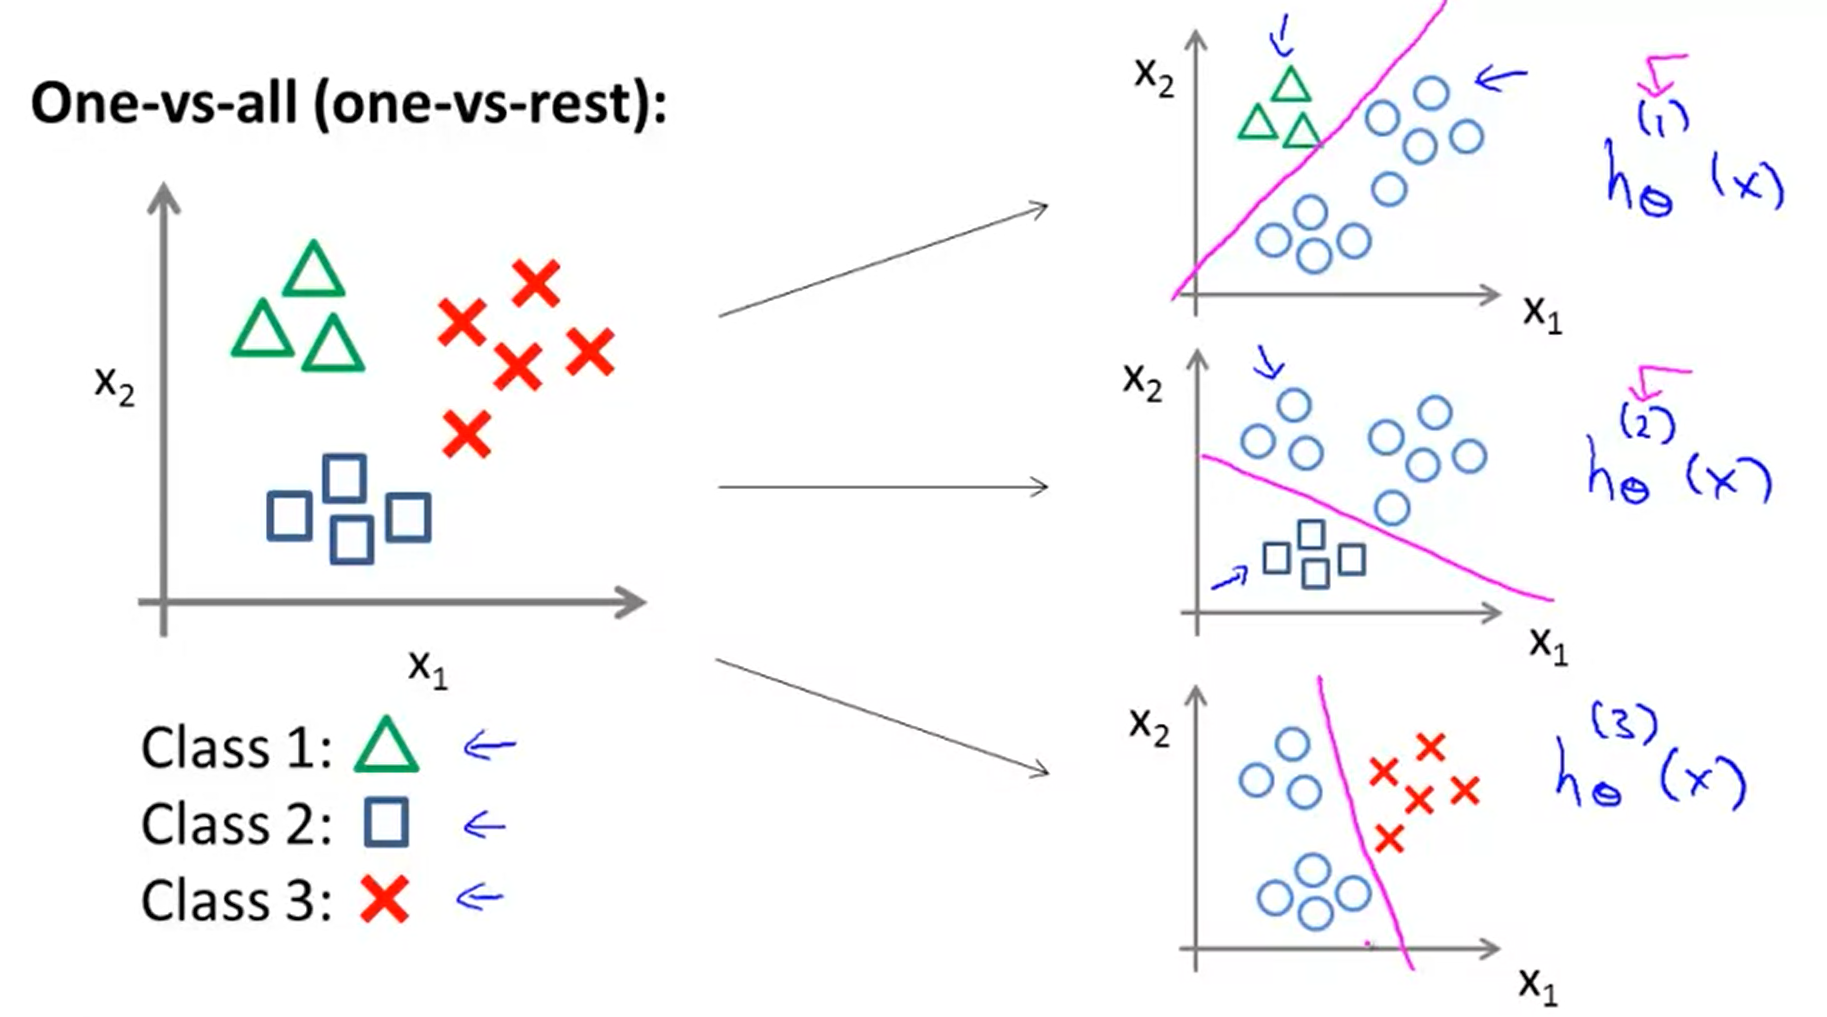

## Regularization#
Tomorrow